<a href="https://colab.research.google.com/github/sowmyavarakala/Classification-on-Flipkart-products/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data cleaning and Visualization**

In [131]:
# Mount the google drive to colab
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [132]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# reading the input dataset
Flipkart_data=pd.read_csv("/content/gdrive/MyDrive/flipkart_com-ecommerce_sample.csv")

In [133]:
# Pandas dataframe.info() function is used to get a concise summary of the dataframe.
Flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [134]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of the data frame.
Flipkart_data.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [135]:
# head() retrieves top n rows of a dataframe(default n=5)
Flipkart_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [136]:
# listing out column names of the dataframe.
Flipkart_data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [137]:
# shape returns no of rows and columns of a dataframe.
Flipkart_data.shape

(20000, 15)

In [138]:
# isnull().sum() returns the number of missing values in the data set
Flipkart_data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

Column brand has more null values.

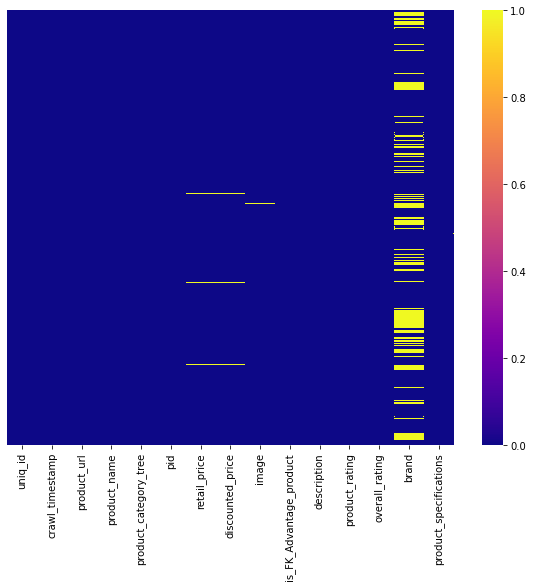

In [139]:
plt.figure(figsize =(10,8))
sns.heatmap(Flipkart_data.isnull(),yticklabels=False,cmap='plasma',cbar=True)

              
  Visualization of null values through a heatmap

In [140]:
# this cell returns first row of the dataset.
Flipkart_data.iloc[0]

uniq_id                                     c2d766ca982eca8304150849735ffef9
crawl_timestamp                                    2016-03-25 22:59:23 +0000
product_url                http://www.flipkart.com/alisha-solid-women-s-c...
product_name                             Alisha Solid Women's Cycling Shorts
product_category_tree      ["Clothing >> Women's Clothing >> Lingerie, Sl...
pid                                                         SRTEH2FF9KEDEFGF
retail_price                                                             999
discounted_price                                                         379
image                      ["http://img5a.flixcart.com/image/short/u/4/a/...
is_FK_Advantage_product                                                False
description                Key Features of Alisha Solid Women's Cycling S...
product_rating                                           No rating available
overall_rating                                           No rating available

In [141]:
# visualising the contents of column "product_category_tree "
Flipkart_data['product_category_tree'][0]

'["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]'

In [142]:
# returns all the values of the column "product_category_tree"
Flipkart_data['product_category_tree']

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 20000, dtype: object

In [143]:
#making this column into a datetime type for visualizing.
Flipkart_data['crawl_timestamp']=pd.to_datetime(Flipkart_data['crawl_timestamp'])
Flipkart_data['crawl_timestamp']

0       2016-03-25 22:59:23+00:00
1       2016-03-25 22:59:23+00:00
2       2016-03-25 22:59:23+00:00
3       2016-03-25 22:59:23+00:00
4       2016-03-25 22:59:23+00:00
                   ...           
19995   2015-12-01 10:15:43+00:00
19996   2015-12-01 10:15:43+00:00
19997   2015-12-01 10:15:43+00:00
19998   2015-12-01 10:15:43+00:00
19999   2015-12-01 10:15:43+00:00
Name: crawl_timestamp, Length: 20000, dtype: datetime64[ns, UTC]

In [144]:
#Creating a new column "crawl_year".
#Values for "crawl_year" comes from "crawl_timestamp" using lambda function
#this was done to visualize the sales in various years

Flipkart_data['crawl_year']=Flipkart_data['crawl_timestamp'].apply(lambda x : x.year)

Text(0, 0.5, 'Sales')

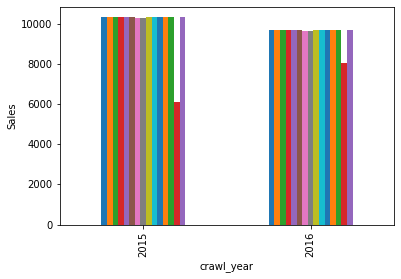

In [145]:
# ploting a bar graph to visualize the sales in years
Flipkart_data.groupby(by='crawl_year',axis=0).count().plot(kind='bar',legend=False)
plt.ylabel('Sales')

Both the years have good number of sales

In [146]:
#Creating a new column "Month".
#Values for "Month" comes from "crawl_timestamp" using lambda function
#this was done to visualize the sales in all months
Flipkart_data['Month']=Flipkart_data['crawl_timestamp'].apply(lambda x : x.month)


Text(0, 0.5, 'Sales')

<Figure size 10800x720 with 0 Axes>

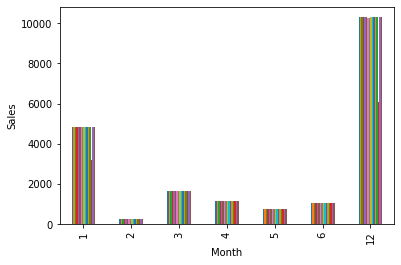

In [147]:
# ploting a bar graph to visualize the sales in terms of Month
plt.figure(figsize=(150,10))
temp=Flipkart_data.groupby(by='Month',axis=0).count().plot(kind='bar',legend=False)
plt.ylabel('Sales')

12th Month of the year has most number of sales.

In [148]:
Flipkart_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crawl_year,Month
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3


In [149]:
# spliting the "product_category_tree" into categories using lambda function seperated by >>
# this is done to find the main category which has to used for prediction.
Flipkart_data['primary_category']=Flipkart_data['product_category_tree'].apply(lambda x :x.split('>>')[0][2:len(x.split('>>')[0])-1])

In [150]:
Flipkart_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crawl_year,Month,primary_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies


Defining functions to split the "product_category_tree" into various categories 

In [151]:
def secondary_category(value):
    try:
        return value.split('>>')[1][1:len(value.split('>>')[1])-1]
    except IndexError:
        return 'None'       
def tertiary_category(value):
    try:
        return value.split('>>')[2][1:len(value.split('>>')[2])-1]
    except IndexError:
        return 'None'
def quaternary_category(value):
    try:
        return value.split('>>')[3][1:len(value.split('>>')[3])-1]
    except IndexError:
        return 'None'
def fifth_category(value):
    try:
        return value.split('>>')[4][1:len(value.split('>>')[4])-1]
    except IndexError:
        return 'None'
def sixth_category(value):
    try:
        return value.split('>>')[5][1:len(value.split('>>')[5])-1]
    except IndexError:
        return 'None'

In [152]:
#Gives categories
Flipkart_data['secondary']=Flipkart_data['product_category_tree'].apply(secondary_category)
Flipkart_data['tertiary']=Flipkart_data['product_category_tree'].apply(tertiary_category)
Flipkart_data['quaternary']=Flipkart_data['product_category_tree'].apply(quaternary_category)
Flipkart_data['fifth']=Flipkart_data['product_category_tree'].apply(fifth_category)
Flipkart_data['sixth']=Flipkart_data['product_category_tree'].apply(sixth_category)

In [153]:
Flipkart_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crawl_year,Month,primary_category,secondary,tertiary,quaternary,fifth,sixth
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts"""
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,None,None
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies""",None,None
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts"""
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,"Sicons All Purpose Arnica Dog Shampoo (500 ml)""",None


In [154]:
# Now we added many columns lets check the no. of rows and columns using shape function
Flipkart_data.shape

(20000, 23)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text major ticklabel objects>)

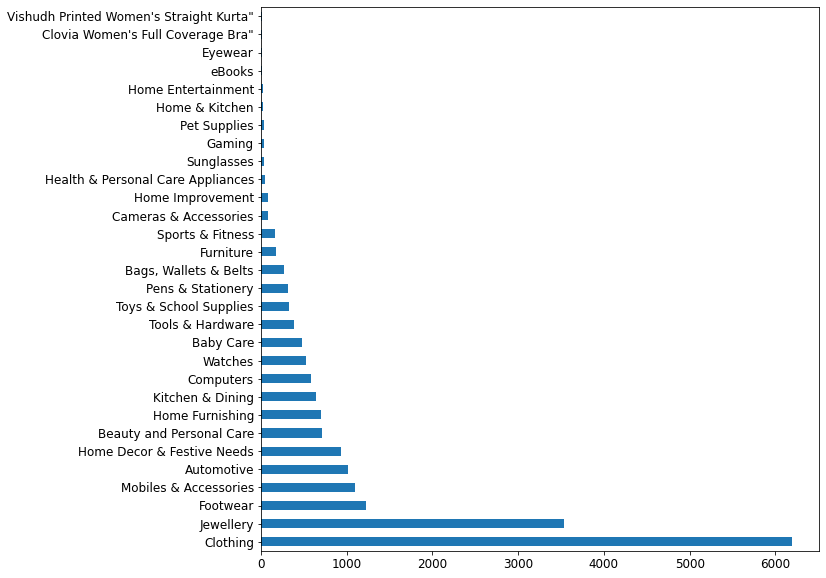

In [155]:
# lets visualize the primary category using plt.
plt.figure(figsize=(10,10))
Flipkart_data['primary_category'].value_counts()[:30].sort_values(ascending=False).plot(kind='barh')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

  **Most customers use flipkart for clothing**

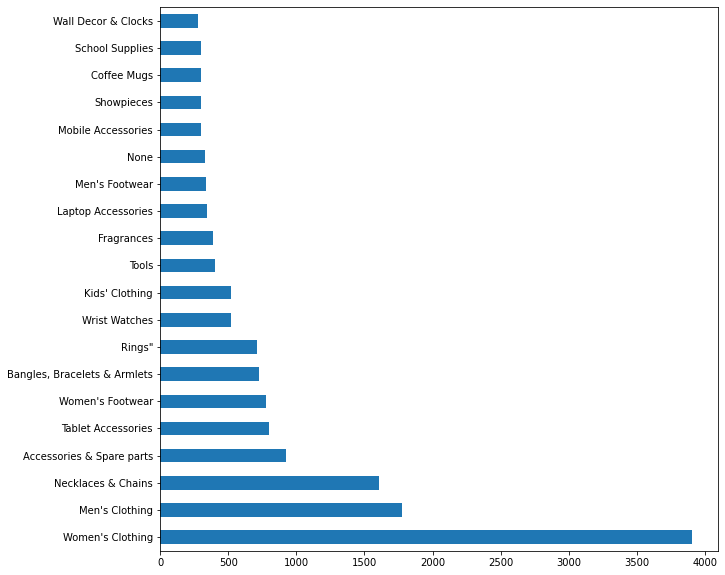

In [156]:
# visualization the secondary category using plt.
plt.figure(figsize=(10,10))
Flipkart_data['secondary'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh')

**As the results says womens use flipkart more for shopping than men**

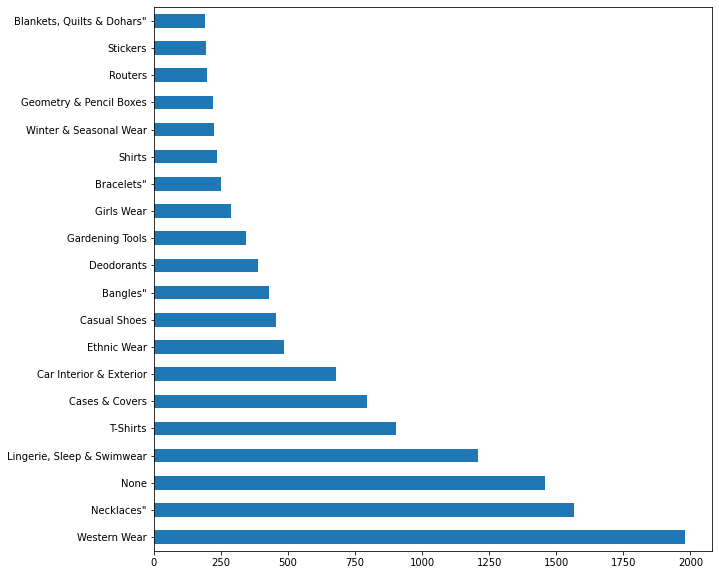

In [157]:
# visualization the tertiary category using plt.
plt.figure(figsize=(10,10))
Flipkart_data['tertiary'].value_counts()[:20].plot(kind='barh')

**In the tertiary category we have customers who prefer western wear**

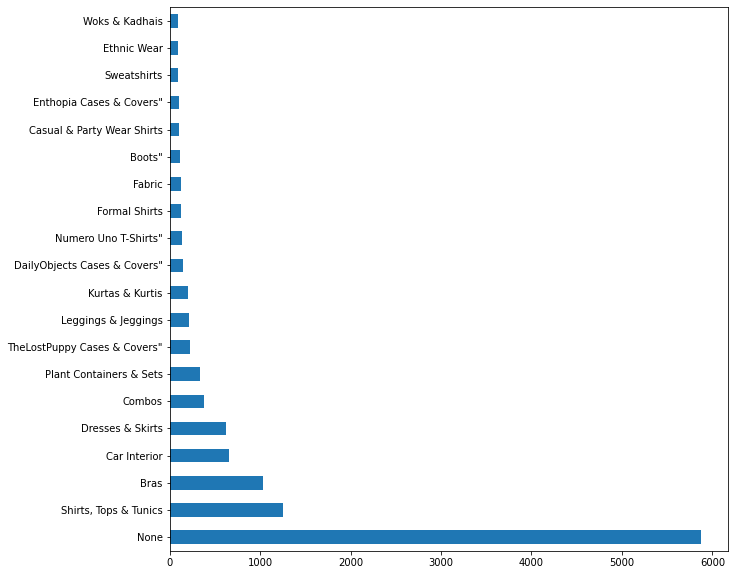

In [158]:
# visualization the quaternary category using plt.
plt.figure(figsize=(10,10))
Flipkart_data['quaternary'].value_counts()[:20].plot(kind='barh')

**Considering 4th category, we have many null values.**

In [159]:
# listing out column names of the dataframe.
Flipkart_data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'crawl_year',
       'Month', 'primary_category', 'secondary', 'tertiary', 'quaternary',
       'fifth', 'sixth'],
      dtype='object')

In [160]:
# Lists out if the column "primary_category" have None values
Flipkart_data.loc[Flipkart_data.primary_category == 'None']

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crawl_year,Month,primary_category,secondary,tertiary,quaternary,fifth,sixth


column "primary_category" have 0 None values

In [161]:
# Lists out if the column "secondary" have None values
Flipkart_data.loc[Flipkart_data.secondary == 'None']

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crawl_year,Month,primary_category,secondary,tertiary,quaternary,fifth,sixth
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23+00:00,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name...",2016,3,Eternal Gandhi Super Series Crystal Paper Weig...,None,None,None,None,None
30,186d40c6852da91166c7eb7856603c51,2016-05-11 09:26:02+00:00,http://www.flipkart.com/bengal-blooms-rose-art...,Bengal Blooms Rose Artificial Plant with Pot,"[""Bengal Blooms Rose Artificial Plant with Po...",ARPEGDHSXZJSHGSN,799.0,579.0,"[""http://img5a.flixcart.com/image/artificial-p...",False,Key Features of Bengal Blooms Rose Artificial ...,No rating available,No rating available,Bengal Blooms,"{""product_specification""=>[{""key""=>""Brand"", ""v...",2016,5,Bengal Blooms Rose Artificial Plant with Pot ...,None,None,None,None,None
44,6ef0a5eb033cd610d455be7102da5685,2016-04-05 17:56:58+00:00,http://www.flipkart.com/vishudh-printed-women-...,Vishudh Printed Women's Straight Kurta,"[""Vishudh Printed Women's Straight Kurta""]",KTAEHE9HAED4VUQB,999.0,499.0,"[""http://img5a.flixcart.com/image/kurta/d/s/y/...",False,Specifications of Vishudh Printed Women's Stra...,No rating available,No rating available,Vishudh,"{""product_specification""=>[{""key""=>""Sleeve"", ""...",2016,4,"Vishudh Printed Women's Straight Kurta""",None,None,None,None,None
45,c9c27aa5dc7df49e82e55e8abb6b4020,2016-04-05 17:56:58+00:00,http://www.flipkart.com/vishudh-printed-women-...,Vishudh Printed Women's Straight Kurta,"[""Vishudh Printed Women's Straight Kurta""]",KTAEHE9KFCMVVSBN,899.0,449.0,"[""http://img5a.flixcart.com/image/kurta/s/c/g/...",False,Specifications of Vishudh Printed Women's Stra...,No rating available,No rating available,Vishudh,"{""product_specification""=>[{""key""=>""Sleeve"", ""...",2016,4,"Vishudh Printed Women's Straight Kurta""",None,None,None,None,None
46,8bc90f8a2ab89daa6ea69d42fe24c985,2016-04-05 17:56:58+00:00,http://www.flipkart.com/vishudh-printed-women-...,Vishudh Printed Women's Anarkali Kurta,"[""Vishudh Printed Women's Anarkali Kurta""]",KTAEHE9KEZBBQHYA,2099.0,1049.0,"[""http://img5a.flixcart.com/image/kurta/f/c/4/...",False,Specifications of Vishudh Printed Women's Anar...,No rating available,No rating available,Vishudh,"{""product_specification""=>[{""key""=>""Sleeve"", ""...",2016,4,"Vishudh Printed Women's Anarkali Kurta""",None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,1097bf3309520a0d6827d6b38efdc8d1,2016-04-12 05:40:04+00:00,http://www.flipkart.com/pazel-slim-fit-men-s-j...,Pazel Slim Fit Men's Jeans,"[""Pazel Slim Fit Men's Jeans""]",JEAEHG766QCG2Z7S,1249.0,549.0,"[""http://img6a.flixcart.com/image/jean/h/n/k/w...",False,Key Features of Pazel Slim Fit Men's Jeans Col...,No rating available,No rating available,Pazel,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,4,"Pazel Slim Fit Men's Jeans""",None,None,None,None,None
19431,088269cb127fff651043273281793597,2016-05-02 05:11:30+00:00,http://www.flipkart.com/smart-traders-girls-be...,SMART TRADERS Girls Bellies,"[""SMART TRADERS Girls Bellies""]",SNDEGAHFHSWVDGNZ,1299.0,650.0,"[""http://img6a.flixcart.com/image/sandal/g/n/z...",False,Key Features of SMART TRADERS Girls Bellies Oc...,No rating available,No rating available,SMART TRADERS,"{""product_specification""=>[{""key""=>""Occasion"",...",2016,5,"SMART TRADERS Girls Bellies""",None,None,None,None,None
1

column "secondary" have 328 None values.

In [162]:
# Lists out if the column "tertiary" have None values
Flipkart_data.loc[Flipkart_data.tertiary == 'None']

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crawl_year,Month,primary_category,secondary,tertiary,quaternary,fifth,sixth
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23+00:00,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name...",2016,3,Eternal Gandhi Super Series Crystal Paper Weig...,None,None,None,None,None
30,186d40c6852da91166c7eb7856603c51,2016-05-11 09:26:02+00:00,http://www.flipkart.com/bengal-blooms-rose-art...,Bengal Blooms Rose Artificial Plant with Pot,"[""Bengal Blooms Rose Artificial Plant with Po...",ARPEGDHSXZJSHGSN,799.0,579.0,"[""http://img5a.flixcart.com/image/artificial-p...",False,Key Features of Bengal Blooms Rose Artificial ...,No rating available,No rating available,Bengal Blooms,"{""product_specification""=>[{""key""=>""Brand"", ""v...",2016,5,Bengal Blooms Rose Artificial Plant with Pot ...,None,None,None,None,None
44,6ef0a5eb033cd610d455be7102da5685,2016-04-05 17:56:58+00:00,http://www.flipkart.com/vishudh-printed-women-...,Vishudh Printed Women's Straight Kurta,"[""Vishudh Printed Women's Straight Kurta""]",KTAEHE9HAED4VUQB,999.0,499.0,"[""http://img5a.flixcart.com/image/kurta/d/s/y/...",False,Specifications of Vishudh Printed Women's Stra...,No rating available,No rating available,Vishudh,"{""product_specification""=>[{""key""=>""Sleeve"", ""...",2016,4,"Vishudh Printed Women's Straight Kurta""",None,None,None,None,None
45,c9c27aa5dc7df49e82e55e8abb6b4020,2016-04-05 17:56:58+00:00,http://www.flipkart.com/vishudh-printed-women-...,Vishudh Printed Women's Straight Kurta,"[""Vishudh Printed Women's Straight Kurta""]",KTAEHE9KFCMVVSBN,899.0,449.0,"[""http://img5a.flixcart.com/image/kurta/s/c/g/...",False,Specifications of Vishudh Printed Women's Stra...,No rating available,No rating available,Vishudh,"{""product_specification""=>[{""key""=>""Sleeve"", ""...",2016,4,"Vishudh Printed Women's Straight Kurta""",None,None,None,None,None
46,8bc90f8a2ab89daa6ea69d42fe24c985,2016-04-05 17:56:58+00:00,http://www.flipkart.com/vishudh-printed-women-...,Vishudh Printed Women's Anarkali Kurta,"[""Vishudh Printed Women's Anarkali Kurta""]",KTAEHE9KEZBBQHYA,2099.0,1049.0,"[""http://img5a.flixcart.com/image/kurta/f/c/4/...",False,Specifications of Vishudh Printed Women's Anar...,No rating available,No rating available,Vishudh,"{""product_specification""=>[{""key""=>""Sleeve"", ""...",2016,4,"Vishudh Printed Women's Anarkali Kurta""",None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,1097bf3309520a0d6827d6b38efdc8d1,2016-04-12 05:40:04+00:00,http://www.flipkart.com/pazel-slim-fit-men-s-j...,Pazel Slim Fit Men's Jeans,"[""Pazel Slim Fit Men's Jeans""]",JEAEHG766QCG2Z7S,1249.0,549.0,"[""http://img6a.flixcart.com/image/jean/h/n/k/w...",False,Key Features of Pazel Slim Fit Men's Jeans Col...,No rating available,No rating available,Pazel,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,4,"Pazel Slim Fit Men's Jeans""",None,None,None,None,None
19431,088269cb127fff651043273281793597,2016-05-02 05:11:30+00:00,http://www.flipkart.com/smart-traders-girls-be...,SMART TRADERS Girls Bellies,"[""SMART TRADERS Girls Bellies""]",SNDEGAHFHSWVDGNZ,1299.0,650.0,"[""http://img6a.flixcart.com/image/sandal/g/n/z...",False,Key Features of SMART TRADERS Girls Bellies Oc...,No rating available,No rating available,SMART TRADERS,"{""product_specification""=>[{""key""=>""Occasion"",...",2016,5,"SMART TRADERS Girls Bellies""",None,None,None,None,None
1

column "tertiary" have 1457 None values.

In [163]:
# Lists out if the column "quaternary" have None values
Flipkart_data.loc[Flipkart_data.quaternary == 'None']

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crawl_year,Month,primary_category,secondary,tertiary,quaternary,fifth,sixth
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23+00:00,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name...",2016,3,Eternal Gandhi Super Series Crystal Paper Weig...,None,None,None,None,None
24,20cf08ae845d5fd8f2b8cf52b3b9d840,2016-01-03 20:56:50+00:00,http://www.flipkart.com/kennel-rubber-dumbell-...,Kennel Rubber Dumbell With Bell - Small Rubber...,"[""Pet Supplies >> Toys >> Comfort Toys""]",PTYEA6SFGD4X8NAR,190.0,190.0,"[""http://img5a.flixcart.com/image/pet-toy/n/a/...",False,Buy Kennel Rubber Dumbell With Bell - Small Ru...,No rating available,No rating available,Kennel,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,1,Pet Supplies,Toys,"Comfort Toys""",None,None,None
30,186d40c6852da91166c7eb7856603c51,2016-05-11 09:26:02+00:00,http://www.flipkart.com/bengal-blooms-rose-art...,Bengal Blooms Rose Artificial Plant with Pot,"[""Bengal Blooms Rose Artificial Plant with Po...",ARPEGDHSXZJSHGSN,799.0,579.0,"[""http://img5a.flixcart.com/image/artificial-p...",False,Key Features of Bengal Blooms Rose Artificial ...,No rating available,No rating available,Bengal Blooms,"{""product_specification""=>[{""key""=>""Brand"", ""v...",2016,5,Bengal Blooms Rose Artificial Plant with Pot ...,None,None,None,None,None
44,6ef0a5eb033cd610d455be7102da5685,2016-04-05 17:56:58+00:00,http://www.flipkart.com/vishudh-printed-women-...,Vishudh Printed Women's Straight Kurta,"[""Vishudh Printed Women's Straight Kurta""]",KTAEHE9HAED4VUQB,999.0,499.0,"[""http://img5a.flixcart.com/image/kurta/d/s/y/...",False,Specifications of Vishudh Printed Women's Stra...,No rating available,No rating available,Vishudh,"{""product_specification""=>[{""key""=>""Sleeve"", ""...",2016,4,"Vishudh Printed Women's Straight Kurta""",None,None,None,None,None
45,c9c27aa5dc7df49e82e55e8abb6b4020,2016-04-05 17:56:58+00:00,http://www.flipkart.com/vishudh-printed-women-...,Vishudh Printed Women's Straight Kurta,"[""Vishudh Printed Women's Straight Kurta""]",KTAEHE9KFCMVVSBN,899.0,449.0,"[""http://img5a.flixcart.com/image/kurta/s/c/g/...",False,Specifications of Vishudh Printed Women's Stra...,No rating available,No rating available,Vishudh,"{""product_specification""=>[{""key""=>""Sleeve"", ""...",2016,4,"Vishudh Printed Women's Straight Kurta""",None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19936,33b347833631a5040957c7c4b81f7ad7,2015-12-01 10:15:43+00:00,http://www.flipkart.com/purple-women-heels/p/i...,Purple Women Heels,"[""Footwear >> Women's Footwear >> Heels""]",SNDEY8UH5TZ2AJCK,1099.0,899.0,"[""http://img6a.flixcart.com/image/sandal/u/9/w...",False,Flipkart.com: Buy Purple Women Heels only for ...,2,2,NaN,"{""product_specification""=>[{""key""=>""Occasion"",...",2015,12,Footwear,Women's Footwear,"Heels""",None,None,None
19941,618ee8f01d3d2f74a2d6bb7e3040dfc0,2015-12-01 10:15:43+00:00,http://www.flipkart.com/pinq-chiq-women-heels/...,Pinq Chiq Women Heels,"[""Footwear >> Women's Footwear >> Heels""]",SNDEYPKYZ47RUKSX,1099.0,769.0,"[""http://img5a.flixcart.com/image/sandal/z/s/q...",False,Flipkart.com: Buy Pinq Chiq Women Heels only f...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Ideal For""...",2015,12,Footwear,Women's Footwear,"Heels""",None,None,None
19953,77226646cd475e6e90954820197f8cac,2015-12-01 10:15:43+00:00

>column "quaternary" have 5876 None values.





 >**Now if we consider columns "seccondary","tertiary","quanternary" , we may loss many rows.**

>**so considering "primary_category" as category for prediction will be ideal selection which will not have any data loss**

In [164]:
Flipkart_data.loc[:, ['description', 'product_category_tree', 'primary_category']]

,description,product_category_tree,primary_category
0,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Clothing
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[""Furniture >> Living Room Furniture >> Sofa B...",Furniture
2,Key Features of AW Bellies Sandals Wedges Heel...,"[""Footwear >> Women's Footwear >> Ballerinas >...",Footwear
3,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Clothing
4,Specifications of Sicons All Purpose Arnica Do...,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Pet Supplies
...,...,...,...
19995,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care
19996,Buy Wallmantra Large Vinyl Stickers Sticker fo...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care
19997,Buy Elite Collection Medium Acrylic Sticker fo...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care
19998,Buy Elite Collection Medium Acrylic Sticker fo...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care


>Assigning columns 'description', 'product_category_tree','primary_category' to a new dataframe because we predict using category considering description as main feature. So all other columns can be omited.

In [165]:
df = Flipkart_data[['description', 'product_category_tree','primary_category']]

In [166]:
# saving this dataframe as flipkart_com-ecommerce_cleaned_sample.csv for further model
df.to_csv("/content/gdrive/MyDrive/flipkart_com-ecommerce_cleaned_sample.csv")
